# Red para regresión múltiple
<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

In [1]:
import pandas as pd

import matplotlib as mp
import matplotlib.pyplot as plt

import numpy as np

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:
url = 'https://raw.githubusercontent.com/fhernanb/datos/master/datos_regresion_mult_redes.txt'
dt = pd.read_csv(url, comment='#', sep='\t')
dt.head()

,y,x1,x2
0,6.160313,1.168256,3.816337
1,25.522090,-1.718673,4.853366
2,-4.496165,2.066200,-1.375973
3,11.484440,-3.586915,1.902173
4,0.620663,-1.789701,-2.445758


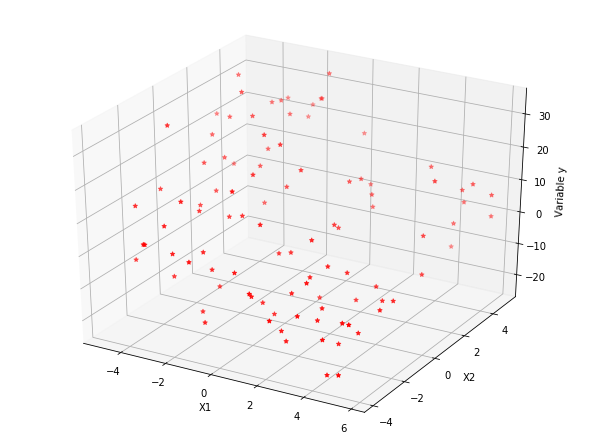

In [3]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure(figsize=(8, 6))
ax = Axes3D(fig)

x1 = dt["x1"]
x2 = dt["x2"]
y = dt["y"]

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Variable y');

# Sin transformar los datos

A continuación la matriz $x$ y el vector $y$.

In [4]:
x = dt[['x1', 'x2']]
y = dt.y

In [5]:
x[:5] # Para ver los 5 primeros valores

,x1,x2
0,1.168256,3.816337
1,-1.718673,4.853366
2,2.066200,-1.375973
3,-3.586915,1.902173
4,-1.789701,-2.445758


Para definir la red

In [6]:
red1 = MLPRegressor(activation='logistic', max_iter=150000, hidden_layer_sizes=(1))

Para entrenar la red

In [7]:
red1.fit(x, y)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1, learning_rate='constant',
             learning_rate_init=0.001, max_iter=150000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Para calcular las predicciones $\hat{y}$.

In [8]:
y_hat = red1.predict(x)

Para ver si las predicciones $\hat{y}$ acompañan los verdaderos valores $y$.

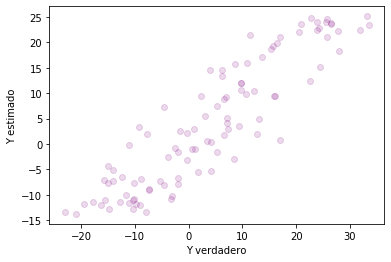

In [9]:
plt.scatter(x=y, y=y_hat, color='purple', alpha=0.15)
plt.xlabel('Y verdadero')
plt.ylabel('Y estimado');

In [10]:
np.corrcoef(y, y_hat)

array([[1.        , 0.90395589],
       [0.90395589, 1.        ]])

In [11]:
red1.score(x, y)

0.8163438783629908

# Transformando los datos

A continuación la matriz $x$ y el vector $y$.

In [12]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [13]:
x_norm = NormalizeData(dt[['x1', 'x2']])
y_norm = NormalizeData(dt.y)

In [14]:
x_norm[:5] # Para ver los 5 primeros valores

,x1,x2
0,0.568905,0.870284
1,0.298792,0.987411
2,0.652920,0.283841
3,0.123992,0.654090
4,0.292147,0.163014


In [15]:
red2 = MLPRegressor(activation='logistic', max_iter=5000, hidden_layer_sizes=(1))
red2.fit(x_norm, y_norm)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1, learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
y_hat = red2.predict(x_norm)

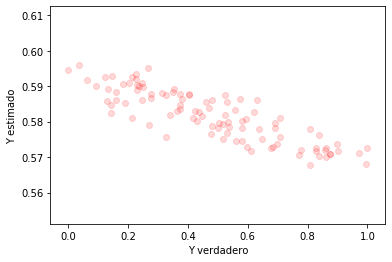

In [17]:
plt.scatter(x=y_norm, y=y_hat, color='red', alpha=0.15)
plt.xlabel('Y verdadero')
plt.ylabel('Y estimado');

In [18]:
np.corrcoef(y_norm, y_hat)

array([[ 1.        , -0.86022688],
       [-0.86022688,  1.        ]])

In [19]:
red2.score(x_norm, y_norm)

-0.21827787781376776

Para ver los pesos de la red se usa:

In [20]:
red2.coefs_

[array([[-0.40447059],
        [ 0.19795644]]), array([[-0.24635718]])]

Para ver los bias de la red se usa:

In [21]:
red2.intercepts_

[array([-0.61406262]), array([0.66271794])]